In [46]:
## packages installed

import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import seaborn
import keras
import mediapipe as mp 

### Load Data 

In [54]:
## TO-DO: Load the ASL Alphabet dataset, using keras.preprocessing.image 

from keras.preprocessing.image import ImageDataGenerator
import os
train_data= pathlib.Path(os.path.expanduser("~/Desktop/DAML_ASL/archive/asl_alphabet_train/asl_alphabet_train")).with_suffix('')
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data,
  validation_split=0.2,
  subset="training",
  seed=123)

val_ds = tf.keras.utils.image_dataset_from_directory(train_data,
  validation_split=0.2,
  subset="validation",
  seed=123)



Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


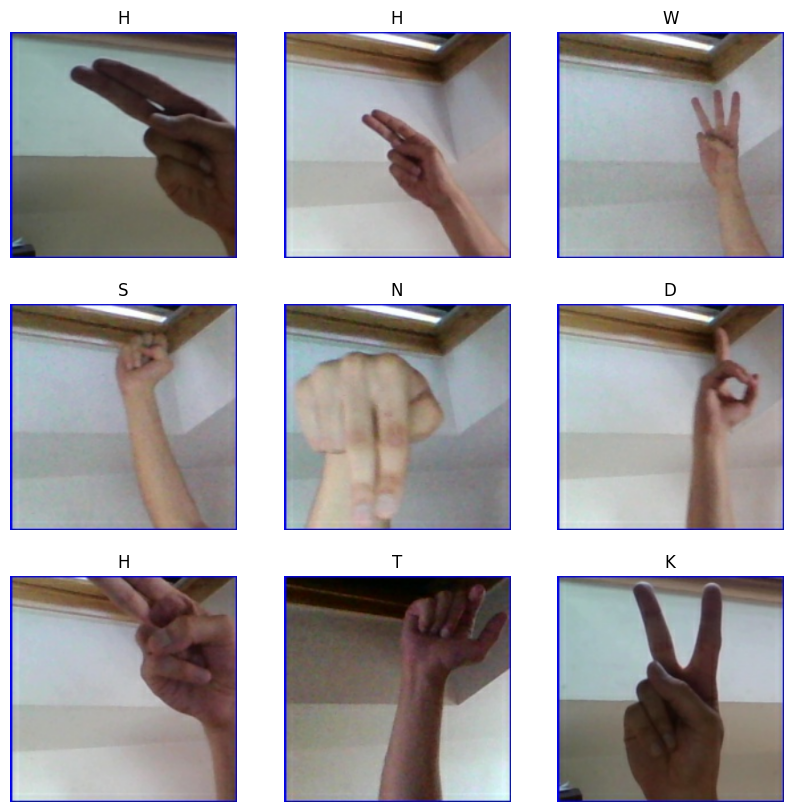

In [50]:
train_ds.class_names
import matplotlib.pyplot as plt
plt.imshow(imagenew)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

### MediaPipe

##### check https://developers.google.com/mediapipe/solutions/vision/hand_landmarker/python for guidance on this section

In [ ]:
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [7]:
## TO-DO: Download and Load Model Path

## Example model path given here 

model_path = '/absolute/path/to/gesture_recognizer.task'


In [ ]:
## TO-DO: prepare image data, create task, and run the task

import mediapipe as mp

BaseOptions = mp.tasks.BaseOptions
HandLandmarker = mp.tasks.vision.HandLandmarker
HandLandmarkerOptions = mp.tasks.vision.HandLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode



In [ ]:
def process_output(landmarks):
    """
    extract and clean landmark coordinate data: including 
    - Removing depth (or z dimension)
    - Centralizing coordinates to center point of hand
    - Flattening to 1D array 
    - Normalization w.r.t. max value 
 
    Paramaters
    ---------
    landmakrs: output from Mediapipe model 
    """
    ##TO-DO: complete and use this function!

In [ ]:

##TO-DO: generate the train and test set
X_train, y_train, X_test, y_test = ...

### Model Training with ResNet / VGG

In [9]:
##TO-DO: train and evaluate model

### Model Training with Mediapipe Landmarks (Random Forest, LSTM, etc.)

In [8]:
##TO-DO: train and evaluate model